In [550]:
import numpy as np
import pandas as pd
import mlp
import sklearn.model_selection
import importlib
import time
import pickle
import matplotlib.pyplot as plt
import gc

In [261]:
data = pd.read_csv("../../mnist_train.csv")
data2 = pd.read_csv("../../mnist_test.csv")

In [589]:
importlib.reload(mlp)

<module 'mlp' from '/home/adrien/Documents/IFT6135/assigment1/practical/mlp.py'>

In [262]:
data.values.shape

(10000, 785)

In [264]:
X = data.values[:,1:]/255
Y = data.values[:,0]
X_test = data2.values[:, 1:]/255
Y_test = data2.values[:, 0]
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split( X, Y, test_size=0.2, random_state=42)

In [304]:
X_valid.shape

(12000, 784)

In [566]:
model1 = mlp.MLP_2L(784, 500, 500, 10, init="glorot", activation="sigmoid", l1=0, l2=0)  

Input dimension 784	Layer 1 dimension 500	Layer 2 dimension 500	Output dimension 10	 Initilization method glorot	Activation function sigmoid
Total number of parameters : 648010


In [567]:
dic = model1.fit(X_train[:1000,:], Y_train[:1000], 10, 10, 0.01, validation_data=(X_valid, Y_valid), epsilon=0.1 )   

Train on 1000 samples	Evaluate on 12000

Epoch 1/10		Total training time 0.0s
	Samples 1000/1000	Epoch time 7.62s	Accuracy 0.109	Loss 2.269	Valid accuracy 0.098	 Valid loss 2.278
Epoch 2/10		Total training time 7.6s
	Samples 1000/1000	Epoch time 7.58s	Accuracy 0.115	Loss 2.228	Valid accuracy 0.103	 Valid loss 2.238
Epoch 3/10		Total training time 15.2s
	Samples 1000/1000	Epoch time 7.44s	Accuracy 0.203	Loss 2.186	Valid accuracy 0.183	 Valid loss 2.196
Epoch 4/10		Total training time 22.6s
	Samples 1000/1000	Epoch time 7.37s	Accuracy 0.297	Loss 2.139	Valid accuracy 0.293	 Valid loss 2.150
Epoch 5/10		Total training time 30.0s
	Samples 1000/1000	Epoch time 7.22s	Accuracy 0.371	Loss 2.088	Valid accuracy 0.364	 Valid loss 2.099
Epoch 6/10		Total training time 37.2s
	Samples 1000/1000	Epoch time 8.02s	Accuracy 0.447	Loss 2.030	Valid accuracy 0.445	 Valid loss 2.042
Epoch 7/10		Total training time 45.3s
	Samples 1000/1000	Epoch time 8.51s	Accuracy 0.531	Loss 1.965	Valid accuracy 0.518	 Valid

In [595]:
dic = model1.fit(X_train[:1000,:], Y_train[:1000], 2, 1, 0.001, validation_data=(X_valid, Y_valid), epsilon=0.001, previous=dic )   

Train on 1000 samples	Evaluate on 12000
 samples
Epoch 1/2		Total training time 0.0s
	Samples 1000/1000	Epoch time 46.89s	Accuracy 0.907	Loss 0.363	Valid accuracy 0.857	 Valid loss 0.492
Epoch 2/2		Total training time 46.9s
	Samples 1000/1000	Epoch time 45.63s	Accuracy 0.907	Loss 0.356	Valid accuracy 0.858	 Valid loss 0.487

Total training time 92.52s


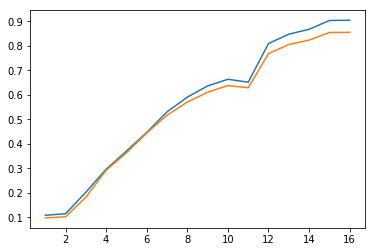

In [593]:
plt.plot(dic["epoch"],dic["train_acc"])
plt.plot(dic["epoch"],dic["valid_acc"])

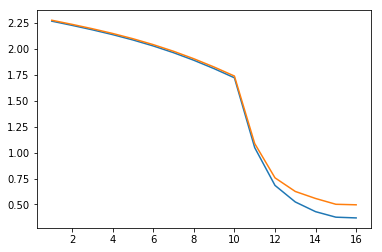

In [592]:
plt.plot(dic["epoch"],dic["train_loss"])
plt.plot(dic["epoch"],dic["valid_loss"])

In [585]:
model1.save("models/model2.mod")

In [590]:
model1 = mlp.MLP_2L.load_model("models/model2.mod")

Input dimension 784	Layer 1 dimension 500	Layer 2 dimension 500	Output dimension 10	 Initilization method load	Activation function sigmoid
Total number of parameters : 648010


In [536]:
model1.fit(X_train[:1000,:], Y_train[:1000], 1, 1, 0.001, validation_data=(X_valid, Y_valid) )

Train on 1000 samples	Evaluate on 12000

Epoch 1/1		Total training time 0.0s
	Samples 1000/1000	Epoch time 62.32s	Accuracy 0.921	Loss 2.922	Valid accuracy 0.905	 Valid loss 2.965

Total training time 66.19s


In [534]:
model1.l1 = 0.0001